# SVM Classifier Challenge

For this challenge, we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings. This challenge builds on the guided example in lesson 3.4.4.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVR


from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [2]:
raw_data = pd.read_csv('/Users/teresaoneill/Dropbox/Thinkful/Datasets/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
for col in raw_data.columns:
    print(raw_data[col].describe())

count             20052
unique            17736
top       Pastry Dough 
freq                 28
Name: title, dtype: object
count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64
count    1.593500e+04
mean     6.322958e+03
std      3.590460e+05
min      0.000000e+00
25%      1.980000e+02
50%      3.310000e+02
75%      5.860000e+02
max      3.011122e+07
Name: calories, dtype: float64
count     15890.000000
mean        100.160793
std        3840.318527
min           0.000000
25%           3.000000
50%           8.000000
75%          27.000000
max      236489.000000
Name: protein, dtype: float64
count    1.586900e+04
mean     3.468775e+02
std      2.045611e+04
min      0.000000e+00
25%      7.000000e+00
50%      1.700000e+01
75%      3.300000e+01
max      1.722763e+06
Name: fat, dtype: float64
count    1.593300e+04
mean     6.225975e+03
std  

Name: bitters, dtype: float64
count    20052.000000
mean         0.007181
std          0.084440
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: blackberry, dtype: float64
count    20052.000000
mean         0.030820
std          0.172834
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: blender, dtype: float64
count    20052.000000
mean         0.011720
std          0.107623
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: blue cheese, dtype: float64
count    20052.000000
mean         0.008977
std          0.094321
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: blueberry, dtype: float64
count    20052.000000
mean         0.022192
std          0.147312
min          0.000000
25%          0.000000
50%          0.000000
75%  

Name: caraway, dtype: float64
count    20052.000000
mean         0.002194
std          0.046793
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: cardamom, dtype: float64
count    20052.000000
mean         0.034959
std          0.183681
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: carrot, dtype: float64
count    20052.000000
mean         0.003391
std          0.058136
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: cashew, dtype: float64
count    20052.000000
mean         0.009924
std          0.099127
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: casserole/gratin, dtype: float64
count    20052.000000
mean         0.005984
std          0.077129
min          0.000000
25%          0.000000
50%          0.000000
75%   

Name: dip, dtype: float64
count    20052.000000
mean         0.001247
std          0.035288
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diwali, dtype: float64
count    20052.000000
mean         0.000100
std          0.009987
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dominican republic, dtype: float64
count    20052.000000
mean         0.000050
std          0.007062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dorie greenspan, dtype: float64
count    20052.000000
mean         0.001596
std          0.039917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: double boiler, dtype: float64
count    20052.000000
mean         0.010273
std          0.100838
min          0.000000
25%          0.000000
50%          0.0

Name: grains, dtype: float64
count    20052.000000
mean         0.000050
std          0.007062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: grand marnier, dtype: float64
count    20052.000000
mean         0.000249
std          0.015789
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: granola, dtype: float64
count    20052.000000
mean         0.003491
std          0.058982
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: grape, dtype: float64
count    20052.000000
mean         0.005984
std          0.077129
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: grapefruit, dtype: float64
count    20052.000000
mean         0.000199
std          0.014123
min          0.000000
25%          0.000000
50%          0.000000
75%     

count    20052.000000
mean         0.000100
std          0.009987
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: kansas city, dtype: float64
count    20052.000000
mean         0.000150
std          0.012231
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: kentucky, dtype: float64
count    20052.000000
mean         0.001995
std          0.044620
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: kentucky derby, dtype: float64
count    20052.000000
mean         0.089318
std          0.285209
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: kid-friendly, dtype: float64
count    20052.000000
mean         0.115350
std          0.319452
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max  

count    20052.000000
mean         0.000997
std          0.031567
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: margarita, dtype: float64
count    20052.000000
mean         0.000050
std          0.007062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: marinade, dtype: float64
count    20052.000000
mean         0.029972
std          0.170515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: marinate, dtype: float64
count    20052.000000
mean         0.001795
std          0.042334
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: marsala, dtype: float64
count    20052.000000
mean         0.000299
std          0.017296
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000

count    20052.000000
mean         0.021345
std          0.144534
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sandwich, dtype: float64
count    20052.000000
mean         0.000648
std          0.025454
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sandwich theory, dtype: float64
count    20052.000000
mean         0.000848
std          0.029105
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sangria, dtype: float64
count    20052.000000
mean         0.000499
std          0.022327
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: santa monica, dtype: float64
count    20052.000000
mean         0.000199
std          0.014123
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max     

count    20052.00000
mean         0.00384
std          0.06185
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: sugar snap pea, dtype: float64
count    20052.000000
mean         0.000698
std          0.026415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sukkot, dtype: float64
count    20052.000000
mean         0.207012
std          0.405174
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: summer, dtype: float64
count    20052.000000
mean         0.015510
std          0.123571
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: super bowl, dtype: float64
count    20052.000000
mean         0.000050
std          0.007062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000


count    20052.000000
mean         0.000050
std          0.007062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: westwood, dtype: float64
count    20052.000000
mean         0.244664
std          0.429898
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: wheat/gluten-free, dtype: float64
count    20052.000000
mean         0.002843
std          0.053242
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: whiskey, dtype: float64
count    20052.000000
mean         0.024287
std          0.153942
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: white wine, dtype: float64
count    20052.000000
mean         0.001496
std          0.038652
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max     

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

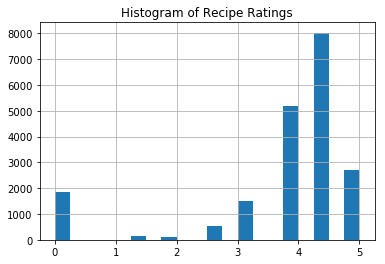

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

## Preparing the data for modeling

First, let's binarize the outcome variable to prepare to run a classifier model.

In [7]:
#Binarize the outcome variable.
raw_data['rating_bin'] = np.where(raw_data['rating']>=4, 1, 0)
raw_data.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

      ...      yogurt  yonkers  yuca  zucchini  cookbooks  leftovers  snack  \
0     ...         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
1     ...         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
2     ...         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
3     ...         0.0      0.0   0.0       0.0        0.0        0.0    0.0   
4     ...         0.0      0.0   0.0       0.0        0.0        0.0    0.0   

   snack week  turkey  rating_bin  
0         0.0     1.0           0  
1         0.0     0.0           1  
2         0.0     0.0           0  
3         0.0     0.0           1  
4         0.0     0.0           0  

[5 rows x 681 columns]

### Tune and cross-validate SVC models

We'll start by dividing the data into train and test sets (80/20 split); then we will use 5-fold cross-validation on the training data to tune the hyperparameters of SVC models, further validating each on the test data. A grid search strategy will be used to tune the hyperparameters. 

In [8]:
X = raw_data.drop(['rating', 'rating_bin', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data['rating_bin']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [9]:
## Define a function to run a grid search to tune hyperparameters
## for a linear SVC
def svc_run(X_train, y_train, c, pen):
    svc = LinearSVC(C=c, penalty=pen, dual=False)
    svc.fit(X_train, y_train)
    print('SCV results:\n')
    print('Regularization: ', pen, ' = ', c)
    print('Accuracy, 5 folds: ', cross_val_score(svc, X_train, y_train, cv=5))
    avg_score = cross_val_score(svc, X_train, y_train, cv=5).mean()
    print('Average CV score: ', avg_score)
    y_pred = svc.predict(X_train)
    print('Accuracy, test:\n ', classification_report(y_train, y_pred)) 

def linear_svc_tune(X_train, y_train, C=[1e-7, 1e-3, 0.1, 0.5, 1, 100, 1000, 1e5]):
    penalties = ['l1','l2']
    for pen in penalties:
        for c in C:
            svc_run(X_train, y_train, c, pen)

In [10]:
linear_svc_tune(X_train, y_train)

SCV results:

Regularization:  l1  =  1e-07
Accuracy, 5 folds:  [ 0.46618884  0.46633416  0.46633416  0.46633416  0.46633416]
Average CV score:  0.466305100446
Accuracy, test:
               precision    recall  f1-score   support

          0       0.47      1.00      0.64      7480
          1       0.00      0.00      0.00      8561

avg / total       0.22      0.47      0.30     16041

SCV results:

Regularization:  l1  =  0.001


/Users/teresaoneill/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy, 5 folds:  [ 0.54908071  0.55517456  0.55798005  0.55174564  0.55891521]
Average CV score:  0.55457923437
Accuracy, test:
               precision    recall  f1-score   support

          0       0.53      0.37      0.44      7480
          1       0.57      0.72      0.63      8561

avg / total       0.55      0.55      0.54     16041

SCV results:

Regularization:  l1  =  0.1
Accuracy, 5 folds:  [ 0.59021502  0.60411471  0.60629676  0.59413965  0.60879052]
Average CV score:  0.600711333228
Accuracy, test:
               precision    recall  f1-score   support

          0       0.62      0.53      0.57      7480
          1       0.64      0.72      0.68      8561

avg / total       0.63      0.63      0.63     16041

SCV results:

Regularization:  l1  =  0.5
Accuracy, 5 folds:  [ 0.5939545   0.60972569  0.61253117  0.59382793  0.60567332]
Average CV score:  0.60314252154
Accuracy, test:
               precision    recall  f1-score   support

          0       0.63      0.56

/Users/teresaoneill/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SCV results:

Regularization:  l2  =  0.001
Accuracy, 5 folds:  [ 0.58616391  0.60255611  0.60255611  0.590399    0.60099751]
Average CV score:  0.596534528434
Accuracy, test:
               precision    recall  f1-score   support

          0       0.62      0.46      0.53      7480
          1       0.61      0.75      0.67      8561

avg / total       0.61      0.61      0.61     16041

SCV results:

Regularization:  l2  =  0.1
Accuracy, 5 folds:  [ 0.59270801  0.60629676  0.61190773  0.59538653  0.60910224]
Average CV score:  0.603080255112
Accuracy, test:
               precision    recall  f1-score   support

          0       0.63      0.56      0.59      7480
          1       0.65      0.72      0.68      8561

avg / total       0.64      0.64      0.64     16041

SCV results:

Regularization:  l2  =  0.5
Accuracy, 5 folds:  [ 0.59582424  0.60660848  0.61315461  0.59382793  0.60941397]
Average CV score:  0.603765846369
Accuracy, test:
               precision    recall  f1-sco

With a linear kernel, the best combination of hyperparamters uses L1 regularization with an alpha of 1, which yields an overall accuracy of 60.45% in the training data over 5 folds. Precision and recall are both higher for positive reviews than for negative reviews. Let's run the model with and take a look at the coefficients.

Note that when I ran this kernel previously, C=0.1 always yielded the best results, so to be safe, I will select 0.1 for my test below.

In [11]:
lin_svc = LinearSVC(C=0.1, penalty='l1', dual=False)
lin_svc.fit(X_train, y_train)
co_dict = {'features': X_train.columns.values, 'coefficients': lin_svc.coef_[0]}
ranked_co = pd.DataFrame(data=co_dict)
ranked_co['coef_absolute'] = abs(ranked_co['coefficients'])
ranked_co = ranked_co.sort_values('coef_absolute', ascending=False)
print(ranked_co)

     coefficients              features  coef_absolute
670     -0.509758             leftovers       0.509758
69       0.479033               brisket       0.479033
2        0.431756       22-minute meals       0.431756
262     -0.425117         harpercollins       0.425117
67      -0.414263                  brie       0.414263
304      0.406719        kentucky derby       0.406719
418     -0.365120           oktoberfest       0.365120
651     -0.359124            weelicious       0.359124
3       -0.342863  3-ingredient recipes       0.342863
448      0.339676                pastry       0.339676
253      0.336091           ground lamb       0.336091
593      0.334440     stuffing/dressing       0.334440
619     -0.332169                  tofu       0.332169
224     -0.325316         friendsgiving       0.325316
360      0.311848               marsala       0.311848
237      0.304373           goat cheese       0.304373
316      0.284814             lamb chop       0.284814
478      0

Next, let's set up a SVC using an RBF kernel instead of a linear kernel. With a dataset of this size, running the RBF SVC was prohibitive in terms of computation cost, causing the kernel to freeze, so we will move on at this point to testing the linear SVC.

In [12]:
## Define a function to run a grid search to tune hyperparameters
## for an rbf SVC
def svc_run(X_train, y_train, c, gam):
    svc = SVC(C=c, gamma=gam, kernel='rbf', verbose=True)
    svc.fit(X_train, y_train)   
    print('SCV results:\n')
    print('Regularization: ', c)
    print('Gamma: ', gam)
    print('Accuracy, 5 folds: ', cross_val_score(svc, X_train, y_train, cv=5))
    avg_score = cross_val_score(svc, X_train, y_train, cv=5).mean()
    print('Average CV score: ', avg_score)
    y_pred = svc.predict(X_train)
    print('Accuracy, test:\n ', classification_report(y_train, y_pred)) 

def rbf_svc_tune(X_train, 
                 y_train, 
                 C = [1e-7, 1e-3, 0.1, 0.5, 1, 100],
                 gamma = [0.1, 0.3, 0.5, 1.0]):
    for gam in gamma:
        for c in C:
            svc_run(X_train, y_train, c, gam)

In [13]:
#rbf_svc_tune(X_train, y_train)

We'll inspect the results of the RBF SVC cross-validation and report on the best iteration once it's debugged. 

Now that we have our tuned hyperparameters, let's use lin_svc, which we fitted above, and see how it fares with the test data.

In [14]:
y_pred = lin_svc.predict(X_test)
print('Accuracy, test:\n ', classification_report(y_test, y_pred))

Accuracy, test:
               precision    recall  f1-score   support

          0       0.57      0.49      0.53      1834
          1       0.61      0.69      0.65      2177

avg / total       0.59      0.60      0.59      4011



## Bias in the dataset

As the lesson points out, the sample of reviewers is heavily biased: people choose to prepare recipes based on cuisines, ingredients, and cooking styles that they like, so the sample is generally biased toward positive reviews. 

In general, reviews are biased toward the extremes: people are more likely to give polarized reviews, because people in the middle may not feel strongly enough to provide feedback. We can observe in this dataset, for example, that there are no 3.5 ratings at all.

Something interesting and indicative of potential sampling bias also emerges in the coefficients of the LinearSVC, which is that among the features with higher absolute coefficients are ingredients and keywords associated with holidays, e.g., the Jewish holidays of Shavuot, Passover, and Rosh Hashanah/Yom Kippur, when brisket is often enjoyed. Lunar New Year and the Kentucky Derby are other festivals that occur among the most important coefficients (at least on the previous runs of the kernel). It is possible that this indicates a demoraphic bias in the sample--perhaps Epicurious is more popular among specific demogrpahic groups, e.g., Jewish- and Chinese-Americans, or affluent Americans who are more likely to be interested in the Kentucky Derby and expensive cheeses. 

### Additional notes

Missing values prevent the model from running. If we wanted to reintroduce features related to nutritional information, which include many missing datapoints, is there any way to add this information without sacrificing all rows with NaNs, while still using sklearn?